In [1]:
import numpy as np
import neuralNetwork as nn
import learningFunctions as lnf
import errorFunctions as errfun
import activationFunctions as actfun
import datasets as ds
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Costruzione path
current_path = os.getcwd()
data_path = os.path.join(current_path, 'Data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

In [3]:
#Lettura csv
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [4]:
#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

In [5]:
#Estrapoliamo il numero di righe e di colonne di train e test
m, n = train_array.shape 
mtest, ntest = test_array.shape  

np.random.shuffle(train_array)  # Mescola casualmente i dati prima di suddividerli in set di sviluppo e training

In [6]:
Xval, Yval = ds.get_mnist_validation(train_array, n)
Xtrain, Ytrain = ds.get_mnist_training(train_array, n, m)
Xtest, Ytest = ds.get_mnist_testing(test_array, ntest, mtest)
print(Xtrain.shape, Ytrain.shape, Xval.shape, Yval.shape, Xtest.shape, Ytest.shape)

(784, 47999) (10, 47999) (784, 11999) (10, 11999) (784, 9999) (10, 9999)


In [7]:
#A neural network with just one hidden layer is created
hidden_activation_functions = [actfun.leaky_relu, actfun.leaky_relu, actfun.leaky_relu, actfun.leaky_relu, actfun.leaky_relu]
hidden_layers = [50, 50, 50, 50, 50]
output_activation_function = actfun.identity
error_function = errfun.cross_entropy_softmax
input_layer_size = Xtrain.shape[0]
output_layer_size = Ytrain.shape[0]
network = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)


In [8]:
#A copy of the network is made, so one can restore the original neural network,
# if one wants
train_mia_net=lnf.duplicate_network(network)
lnf.get_net_structure(train_mia_net,show=1)

num_hidden_layers:  5
input_size:  784
output_size:  10
neurons in hidden layers:
50
50
50
50
50
activation functions:
leaky_relu
leaky_relu
leaky_relu
leaky_relu
leaky_relu
identity
error_function: crossEntropyMCSoftMax


In [9]:
#batch training
err,errV=lnf.train_neural_network(train_mia_net,Xtrain,Ytrain,Xval,Yval,max_epochs=100,learning_rate=0.00001)

Epoch: 0, Train Error: 110938.33624420699, Train Accuracy: 0.0987520573345278, Val Error: 27718.11210389936, Val Accuracy: 0.10075839653304441


KeyboardInterrupt: 

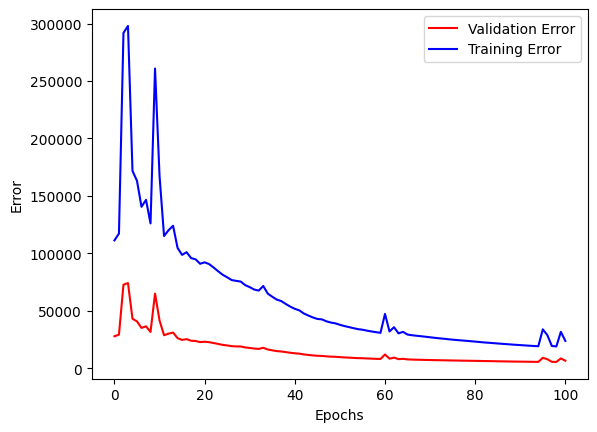

In [ ]:
plt.figure()
plt.plot(errV, 'r', label='Validation Error')
plt.plot(err, 'b', label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#Accuracy on both the training and test set
acc=lnf.netAccuracy(train_mia_net,Xtest,Ytest)
print('test accuracy: ',acc)
acc=lnf.netAccuracy(train_mia_net,Xtrain,Ytrain)
print('train accuracy: ',acc)

test accuracy:  0.8700870087008701
train accuracy:  0.8891851913581533


y_net: [[0.09615541]
 [0.09931262]
 [0.07561724]
 [0.11277079]
 [0.11808115]
 [0.14868778]
 [0.08098837]
 [0.0902187 ]
 [0.09381432]
 [0.08435362]]
y_net_trained: [[1.43002313e-223]
 [1.27699036e-003]
 [3.07918004e-005]
 [1.03055074e-004]
 [4.88121741e-003]
 [3.48349738e-003]
 [2.33946297e-006]
 [1.34834845e-002]
 [3.70896297e-004]
 [9.76367728e-001]]


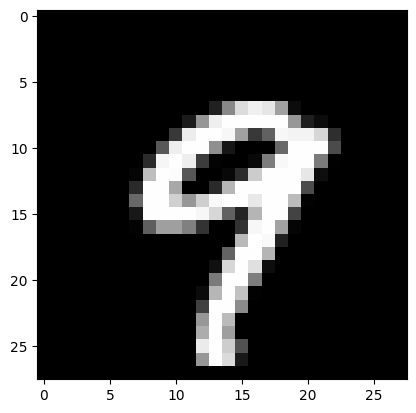

In [ ]:
x = 8898
lnf.test_prediction(network, train_mia_net, x, Xtest)